# **Next Word Prediction with `Bi-directional LSTM`**

### **Introduction**

> **`Next Word Prediction` (also called Language Modeling) is the task of `predicting` what word comes next. It is one of the fundamental tasks of NLP.**

...

### **Application Language Modelling**

1. **Mobile keyboard `text recommendation`**


2. **Whenever we search for something on any search engine, we get many `suggestions` and,  as we type new words in it, we get `better recommendations` according to our searching `context`.**


3. **`Story Generator`**

![Image](https://i.pinimg.com/originals/3f/b4/2e/3fb42e1f042063e0423496529978dd8e.jpg)


'''

### **Task**

* Here, we will use `NLP` and try to make a prediction model using `Bidirectional LSTM` (Long short-term memory) model that will predict `next words` of sentence.

'''

### **Process**

* [1. Preparing Dataset](#1)
* [2. Building and Training Model](#2)
* [3. Generating Stories](#3)

***
***

## **1. Preparing Dataset** <a id="1"></a>

### **About - `Medium Articles Dataset`**

* The [Medium Articles Dataset](https://www.kaggle.com/datasets/dorianlazar/medium-articles-dataset) on Kaggle is a collection of data about articles published on `Medium`, a popular online publishing platform.

Here’s what you need to know:

1. The dataset contains information about more than `6,000 articles`.
2. These articles were published in the year `2019`.
3. The articles come from `7` different `publications`.

* This dataset can be very useful for various data analysis and machine learning tasks. For example, you could use it to analyze `trends` in article topics, understand the `popularity` of different publications, or even `train` a machine learning model to predict the popularity of an article based on its content and other features.

* We here will use this dataset to train a model for `Next Word Prediction`.


'''

### **Import necessary libraries and packages**

In [1]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf

from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.optimizers import Adam

'''

### **Mounting Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


'''

### **Loading Dataset**

* Simply download the `medium_data.csv` file from [Medium Articles Dataset](https://www.kaggle.com/datasets/dorianlazar/medium-articles-dataset) on Kaggle.

* Then `import` the file from the directory as seen below.


In [3]:
medium_data = pd.read_csv('/content/drive/My Drive/Medium_Articles_Dataset/medium_data.csv')
medium_data.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


* Here, we have a `10` different fields and `6508` records but we will only use `title` field for predicting next word.

In [4]:
print("Number of records: ", medium_data.shape[0])
print("Number of fields: ", medium_data.shape[1])

Number of records:  6508
Number of fields:  10


In [5]:
medium_data['title']

0       A Beginner’s Guide to Word Embedding with Gens...
1       Hands-on Graph Neural Networks with PyTorch & ...
2                            How to Use ggplot2 in Python
3       Databricks: How to Save Files in CSV on Your L...
4       A Step-by-Step Implementation of Gradient Desc...
                              ...                        
6503    “We” vs “I” — How Should You Talk About Yourse...
6504                     How Donald Trump Markets Himself
6505        Content and Marketing Beyond Mass Consumption
6506    5 Questions All Copywriters Should Ask Clients...
6507               How To Write a Good Business Blog Post
Name: title, Length: 6508, dtype: object

'''

### **`Preprocessing` Titles**

* `Text preprocessing` in Machine Learning is a critical step that `transforms` `raw`, unstructured text data into a format that can be understood by ML algorithms and used for further processing, such as `training` a Model. 

Here are some advantages:

* **Improves Model Performance**: Preprocessing can greatly `improve` the results of your analysis.
* **Reduces Complexity**: It helps `reduce` the `complexity` of the data, preventing `overfitting`, and resulting in a better model.
* **Enhances Accuracy**: By improving the `quality` of the data used to train machine learning models, preprocessing can help improve the `accuracy` and reliability of these models.
* **Facilitates Better Decision Making**: It leads to better `predictions` and more informed decision-making.


'''

##### **1. `Removing` `unwanted` characters and words in titles**

* Looking at `titles`, we can see there are some of `unwanted characters` and words in it which can not be useful for us to predict infact it might `decrease` our model `accuracy` so we have to remove it.

In [6]:
medium_data['title'] = medium_data['title'].apply(lambda x: x.replace(u'\xa0',u' '))
medium_data['title'] = medium_data['title'].apply(lambda x: x.replace('\u200a',' '))

Here is how the code works: 

* This code uses the `pandas` library.

1. **medium_data['title'] = medium_data['title'].apply(lambda x: x.replace(u'\xa0',u' '))**: 

* This line of code is applying a function to each `title`. 
* The function (lambda x: x.replace(u'\xa0',u' ')) `replaces` every occurrence of the `unicode` character `\xa0` (which represents a `non-breaking space` in the ISO-Latin1 (ISO 8859-1) character set) with a regular `space` ' '.

2. **medium_data['title'] = medium_data['title'].apply(lambda x: x.replace('\u200a',' '))**: 

* The function (lambda x: x.replace('\u200a',' ')) `replaces` every occurrence of the unicode character `\u200a` (which represents a `hair space`) with a regular `space` ' '.


'''

##### **2. `Tokenzation`**

* `Tokenization` is an important step in `preprocessing` text data Natural Language Processing (`NLP`) tasks that involves `breaking` down a `text` document into smaller units called `tokens`. These tokens can be words, phrases, or individual characters.

* The main `purpose` of tokenization is to `transform` `unstructured` data into a format that can be understood by the `models` or algorithms.

In [7]:
tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(medium_data['title'])
total_words = len(tokenizer.word_index) + 1

print("Total number of words: ", total_words)
print("Word: ID")
print("------------")
print("<oov>: ", tokenizer.word_index['<oov>'])
print("Strong: ", tokenizer.word_index['strong'])
print("And: ", tokenizer.word_index['and'])
print("Consumption: ", tokenizer.word_index['consumption'])

Total number of words:  8238
Word: ID
------------
<oov>:  1
Strong:  4
And:  8
Consumption:  8237


* This code is using the `Tokenizer` class from the `keras.preprocessing.text` module in Python. 

Here's what each line does:

1. **tokenizer = Tokenizer(oov_token='<oov>')**: This line initializes a `Tokenizer` object. The `oov_token='<oov>'` argument means that any word not found in the trained word index will be replaced with the token `<oov>` (out-of-vocabulary).

2. **tokenizer.fit_on_texts(medium_data['title'])**: This line trains the tokenizer on the text data present in the 'title' column of the `medium_data` DataFrame. The tokenizer creates a word index, which is a dictionary where keys are words and values are unique identifiers for each word.

3. **total_words = len(tokenizer.word_index) + 1**: This line calculates the total number of unique words in the word index created by the tokenizer and adds 1 to account for the `<oov>` token.

4. The **print** statements display the total number of words and the unique identifiers for specific words in the word index.


'''

##### **3. Making `n_gram` model**

* An `n-gram model` is a type of `probabilistic` language model used for predicting the `next item` in a sequence, such as the next word in a sentence. 

> `N-grams` are contiguous sequences of `n` items in text data. 

* The ‘items’ can be characters, words, or even sentences, depending on the application.

* For example, in the sentence “This is an example”, the `2`-grams (or `bigrams`) would be: “This is”, “is an”, “an example”.

* N-gram models are used in various natural language processing tasks like `speech recognition`, machine `translation`, and `predictive` text input.

In [8]:
input_sequences = []
for line in medium_data['title']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)

    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  48461


* This code is creating a `list` of `n-gram` sequences from the `title` column of the medium_data DataFrame

Here’s what each part does:

1. **input_sequences = []**: This line initializes an `empty list` that will store the `n-gram` sequences.

2. **for line in medium_data['title']:**: This line starts a `loop` that goes through each `title` in the title column of the medium_data DataFrame.

3. **token_list = tokenizer.texts_to_sequences([line])[0]**: This line `uses` the previously trained `tokenizer` to convert each title into a `sequence` of integers.

4. **for i in range(1, len(token_list)):**: This line starts another `loop` that goes through each `token` in the token list.

5. **n_gram_sequence = token_list[:i+1]**: This line creates an `n-gram` sequence from the start of the token list up to and including the i-th token.

6. **input_sequences.append(n_gram_sequence)**: This line adds the created `n-gram` sequence to the `list` of input sequences.

7. **print("Total input sequences: ", len(input_sequences))**: This line `prints` out the total number of input sequences created.

* In simple terms, this code is preparing the `text` data for use in a machine learning model by creating `n-gram` sequences.

'''

##### **4. `Padding`**

* `Padding` is a technique used to `standardize` the input data `dimensions` so that they can be processed by a neural network. This is particularly important when dealing with `text` data, where sentences or documents can vary in `length`. 

* `Padding` works by adding `extra` tokens (often `zeros`) to the sequences that are `shorter` than the longest sequence in the dataset. These extra tokens are added either at the beginning (pre-padding) or at the end (post-padding) of the sequence. 

* `For example`, if we decide to pad all sequences to a length of 6, our sentences from above would look like this:

            "Hello world!" -> [71, 1331, 4231, 0, 0, 0]
            "How are you doing today?" -> [73, 8, 3215, 55, 927, 0]
            "The weather will be nice tomorrow" -> [83, 91, 1, 645, 1253, 927]

* Here `0` represents the `padding` `token`.

In [9]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 676,
        68], dtype=int32)

* This code uses the `pad_sequences` function from the Keras library to `pad` sequences of data. 

Here’s a breakdown:

1. **max_sequence_len = max([len(x) for x in input_sequences])**: This line of code calculates the `maximum length` of the sequences in `input_sequences`. It does this by iterating over each sequence x in input_sequences, calculating its length with len(x), and then taking the maximum of these lengths.

2. **input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))**: This line uses the `pad_sequences` function to `pad` each sequence in input_sequences to the length of the `longest` sequence (max_sequence_len). The `padding='pre'` argument means that if a sequence is `shorter` than max_sequence_len, `zeros` should be added at the beginning of the sequence until its length matches max_sequence_len. The result is then converted to a `NumPy array`.

3. **input_sequences[1]**: This line simply accesses and `returns` the `second sequence` in input_sequences (since Python uses 0-based indexing, 1 refers to the second element).

* So, in summary, this code is used to ensure that all `sequences` in input_sequences have the `same length` by adding `zeros` at the beginning of shorter sequences. 

'''

### **Prepare `Features` and `Labels`**

* Here, we will use the `last` element of all sequences as a `label`.

* We need to perform `One-hot encoding` on labels corresponding to total_words.

##### **`One-hot encoding`**

* `One-hot encoding` is a technique used in machine learning and deep learning to convert `categorical` data into a format that can be provided to ML algorithms. It’s used to `quantify` categorical data.

* In `one-hot encoding`, each category of a categorical variable is represented as a `binary vector`. All the elements of this vector are `zero`, except for the one that represents the category, which is set to `one`. 

* `For example`, if we have a color feature with three categories (Red, Green, Blue), one-hot encoding will create three binary features corresponding to each category:

            Red   -> [1, 0, 0]
            Green -> [0, 1, 0]
            Blue  -> [0, 0, 1]

* `One-hot encoding` allows the use of `categorical` variables in models that require `numerical input`. It can improve model performance by providing more information to the model about the categorical variable. It can also help avoid the problem of ordinality, which can occur when a categorical variable has a natural ordering.


In [10]:
# create features and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [11]:
print(xs[5])
print(labels[5])
print(ys[5][14])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    5  676   68    2  452 1518]
14
1.0


* This code is creating `features` and `labels` to train our `Next Word Prediction` model. 

Here’s a breakdown:

1. **xs, labels = input_sequences[:,:-1],input_sequences[:,-1]**: 

* This line is `splitting` input_sequences into `features` and `labels`. 
* The `:` operator is used to `slice` arrays in Python. 
* `input_sequences[:,:-1]` means `all` rows and all columns `except` the `last` one, which are used as `features` (xs). 
* `input_sequences[:,-1]` means all rows and only the last column, which is used as the `label` (labels).

2. **ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)**: 

* This line is converting the `labels` into a `one-hot` encoded format using the to_categorical function from Keras. 
* `num_classes=total_words` specifies the total number of `classes`.

3. **print(xs[5])**: This line prints the `6th` element of `xs` (Python uses 0-based indexing).

4. **print(labels[5])**: This line prints the `6th` element of `labels`.

5. **print(ys[5][14])**: This line prints the `15th` element of the `one-hot encoded` representation of the `6th` label.

'''

* In summary, this code is preparing the data for training a machine learning model by creating features and labels and converting the `labels` into a `one-hot encoded` format.

***
***

## **2. Building and Training Model** <a id="2"></a>

### **Architecture of a `Bidirectional LSTM`**

* A `BiLSTM` is a sequence model which contains `two LSTM` layers, one for processing input in the `forward` direction and the other for processing in the `backward` direction. The intuition behind this approach is that by processing data in both directions, the model is able to better understand the relationship between sequences.

* Both of these `LSTM` networks return a `probability vector` as output and the final output is the combination of both of these probabilities. It can be represented as:

            P=Pforward​+Pbackward​
where,

            P : Final probability vector of the network.
            Pforward​ : Probability vector from the forward LSTM network.
            Pbackward​ : Probability vector from the backward LSTM network1.

* The final `output` of each time step is the `combination` of outputs from both `forward` and `backward` LSTM nodes.


'''

### **Model ` Training`**

* This code below uses the `Keras` library to define and train a `Bidirectional LSTM` (BiLSTM) model for a sequence prediction task. 

Here’s a breakdown:

1. **model = Sequential()**: This line initializes a new `sequential` model. A sequential model is appropriate for a plain stack of layers where each layer has exactly `one input` tensor and `one output` tensor.

2. **model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))**: This line adds an `Embedding` layer to the model. The Embedding layer is used to `convert` each `word` in our vocabulary into a `100-dimensional vector`. The input_length parameter is set to max_sequence_len-1, which means that each input sequence to the model will have this length.

3. **model.add(Bidirectional(LSTM(150)))**: This line adds a `BiLSTM` layer to the model with `150 units`. The BiLSTM processes the input sequence in both forward and backward directions.

4. **model.add(Dense(total_words, activation='softmax'))**: This line adds a `Dense` (fully connected) output layer to the model. The number of units is set to `total_words`, which means that the output of the model will be a probability distribution over all words in our vocabulary. The `softmax` activation function ensures that these probabilities sum up to `1`.

5. **adam = Adam(lr=0.01)**: This line initializes an `Adam` optimizer with a learning rate of 0.01. Adam is an optimization algorithm that can be used instead of the classical `stochastic gradient descent` procedure to `update` network weights iterative based on training data.

6. **model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])**: This line `compiles` the model with the `categorical crossentropy loss` function (which is suitable for multi-class classification), the Adam optimizer, and accuracy as a metric.

7. **history = model.fit(xs, ys, epochs=50, verbose=1)**: This line `trains` the model for `50 epochs` on the input data `xs` and target data `ys`. The training history is saved in the history variable.

8. **print(model)**: This line prints a string representation of the model.

In [12]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=50, verbose=1)
#print model.summary()
print(model)


Epoch 1/50
1515/1515 [==============================] - 38s 20ms/step - loss: 6.9849 - accuracy: 0.0855
Epoch 2/50
1515/1515 [==============================] - 19s 12ms/step - loss: 6.1717 - accuracy: 0.1378
Epoch 3/50
1515/1515 [==============================] - 18s 12ms/step - loss: 5.6749 - accuracy: 0.1636
Epoch 4/50
1515/1515 [==============================] - 18s 12ms/step - loss: 5.2177 - accuracy: 0.1896
Epoch 5/50
1515/1515 [==============================] - 17s 11ms/step - loss: 4.7772 - accuracy: 0.2130
Epoch 6/50
1515/1515 [==============================] - 17s 11ms/step - loss: 4.3543 - accuracy: 0.2427
Epoch 7/50
1515/1515 [==============================] - 17s 11ms/step - loss: 3.9554 - accuracy: 0.2806
Epoch 8/50
1515/1515 [==============================] - 17s 11ms/step - loss: 3.5809 - accuracy: 0.3279
Epoch 9/50
1515/1515 [==============================] - 17s 11ms/step - loss: 3.2308 - accuracy: 0.3810
Epoch 10/50
1515/1515 [==============================] - 17s 11m

'''

#### **`Saving` Model and Tokenizer**

In [13]:
import pickle



# Save the tokenizer
with open('/content/drive/My Drive/Model/tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

# Save the model
model.save('/content/drive/My Drive/Model/story_generator_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'''

#### **`Loading` Model and Tokenizer**

In [14]:
import pickle
from keras.models import load_model



# Load the tokenizer
with open('/content/drive/My Drive/Model/tokenizer.pkl', 'rb') as tokenizer_file:
    tokenizer = pickle.load(tokenizer_file)

# Load the model
model = load_model('/content/drive/My Drive/Model/story_generator_model.h5')

'''

### **`Plotting` model accuracy and loss**

* The code defines a function `plot_graphs` that takes a Keras training `history` and a metric name as `inputs`, and `plots` the specified metric as a function of the number of `epochs`. 

* The `matplotlib.pyplot` module is used for creating the plot. 

* The function first plots the specified metric from the training history, then `labels` the x-axis as `“Epochs”` and the y-axis as the specified `metric`, and finally displays the plot using `plt.show()`. 

* The metric plotted against is model `accuracy` and `loss`.

In [15]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

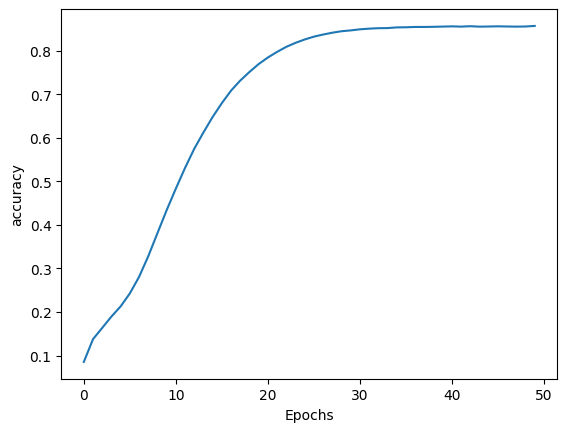

In [16]:
plot_graphs(history, 'accuracy')

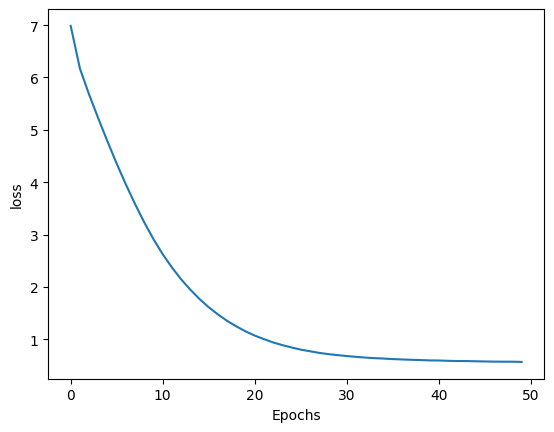

In [17]:
plot_graphs(history, 'loss')

***
***

# **3. Generating Stories** <a id="3"></a>

* This code uses the `Keras` library to predict the next words in a sequence. 

Here’s a breakdown:

1. **from keras.preprocessing.sequence import pad_sequences**: This line imports the `pad_sequences` function from Keras, which is used to ensure that all sequences in a list have the `same length`.

2. **import numpy as np**: This line imports the `numpy` library, which provides support for `arrays` and many mathematical operations.

3. **def predict_next_words(model, tokenizer, text, num_words):**: This line defines a function named `predict_next_words` that takes four arguments: a Keras model (`model`), a tokenizer (`tokenizer`), an input text (`text`), and the number of words to predict (`num_words`).

4. Inside the function:

        The input text is tokenized using the provided tokenizer.
        The tokenized sequence is padded to a length of 100 using the pad_sequences function.
        The model is used to predict the probabilities of the next word for the given input sequence.
        The word with the highest probability is selected as the predicted word.
        The predicted word is then appended to the input text.
        This process is repeated num_words times.


In [21]:
from keras.preprocessing.sequence import pad_sequences
import numpy as np


def predict_next_words(model, tokenizer, text, num_words):
    for _ in range(num_words):
        # Tokenize the input text
        sequence = tokenizer.texts_to_sequences([text])[0]

        # Pad the sequence
        sequence = pad_sequences([sequence], maxlen=100)

        # Predict the probabilities for each class
        probabilities = model.predict(sequence, verbose=0)

        # Find the class with the highest probability
        predicted = np.argmax(probabilities, axis=-1)

        # Convert the predicted word index to word
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break

        # Append the predicted word to the input text
        text += " " + output_word

    return text

In [22]:
predict_next_words(model=model, tokenizer=tokenizer, text="implementation of", num_words=21)

'implementation of rnn lstm and gru using opencv and knowledge users for python how trip into wide day in the application of its'

'''

### **Conclusion**

* The `text` this Model generates `loses` `context` over long distance. 

* One way to counter this is to `include more words` as labels to get `greater context` from the data. 

* We can also `train` the model on clean and `diverse text` from the internet.

***
***